In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_excel("data/jobGrowthByQuarter.xlsx")

In [3]:
data.shape

(23, 2)

In [4]:
data.head()

,Year & Quarter,Jobs Filled
0,2015-Q1,405
1,2015-Q2,100
2,2015-Q3,109
3,2015-Q4,138
4,2016-Q1,777


In [5]:
data["Log Jobs Filled"] = np.log(data["Jobs Filled"])

In [6]:
data.head()

,Year & Quarter,Jobs Filled,Log Jobs Filled
0,2015-Q1,405,6.003887
1,2015-Q2,100,4.605170
2,2015-Q3,109,4.691348
3,2015-Q4,138,4.927254
4,2016-Q1,777,6.655440


In [7]:
train, test = data.iloc[:16,:], data.iloc[16:,:]

In [8]:
model1 = pm.auto_arima(train['Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=167.638, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=168.607, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=169.997, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=172.182, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=166.608, Time=0.04 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=168.218, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=168.209, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=168.174, Time=0.04 sec
 ARIMA(0,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=168.607, Time=0.07 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(1,1,0)[4]             : AIC=167.337, Time=0.02 sec

Best model:  ARIMA(0,0,0)(1,1,0)[4] intercept
Total fit time: 1.027 seconds


In [9]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   16
Model:             SARIMAX(1, 1, 0, 4)   Log Likelihood                 -80.304
Date:                 Tue, 02 Feb 2021   AIC                            166.608
Time:                         16:19:32   BIC                            168.062
Sample:                              0   HQIC                           166.069
                                  - 16                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     72.1726    212.555      0.340      0.734    -344.428     488.773
ar.S.L4        0.6480      0.901      0.720      0.472      -1.117       2.413
sigma2      3.231e+04   1.46e+04      2.213      0.027    3694.415    6.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.93
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.04   Skew:                             2.08
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
logmodel1 = pm.auto_arima(train['Log Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-6.519, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-3.266, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=-3.424, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=16.679, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=-5.251, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=-5.397, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=-3.398, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=-4.565, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=-4.564, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=-2.564, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,1,0)[4] intercept
Total fit time: 0.639 seconds


In [11]:
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   16
Model:             SARIMAX(0, 1, 0, 4)   Log Likelihood                   5.260
Date:                 Tue, 02 Feb 2021   AIC                             -6.519
Time:                         16:19:35   BIC                             -5.549
Sample:                              0   HQIC                            -6.878
                                  - 16                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4179      0.059      7.134      0.000       0.303       0.533
sigma2         0.0244      0.017      1.440      0.150      -0.009       0.058
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.83   Prob(JB):                         0.52
Heteroskedasticity (H):               1.31   Skew:                             0.69
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
nTest = len(test)

In [13]:
test_pred, confint = model1.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


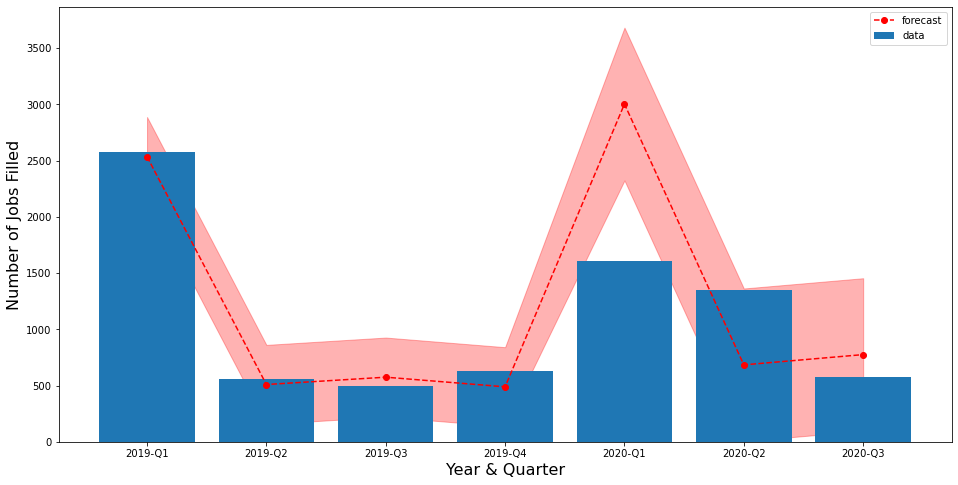

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(test.index, test['Jobs Filled'], label='data')
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.plot(test.index, test_pred, '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0, 0.5, 'Number of Jobs Filled')

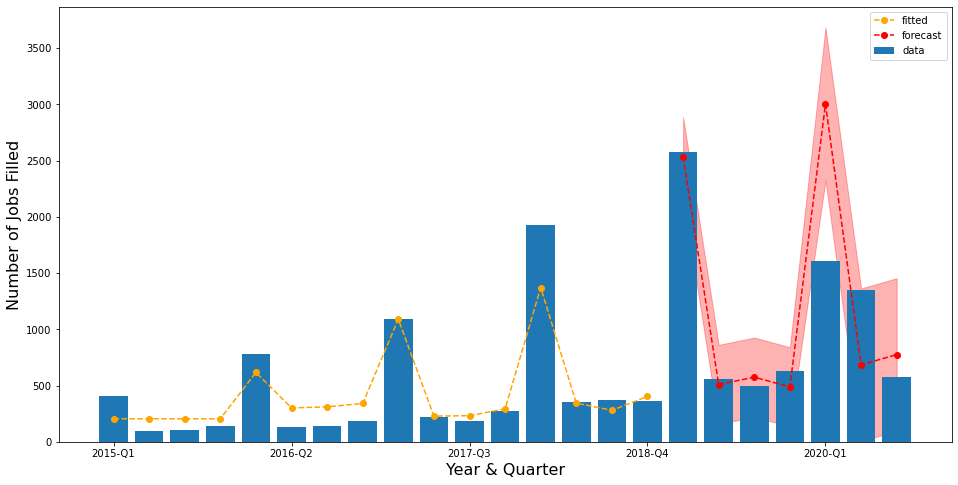

In [15]:
train_pred = model1.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'], '--', marker='o', label='data')
ax.bar(data.index, data['Jobs Filled'], label='data')
ax.plot(train.index, train_pred, '--', marker='o', color='orange', label='fitted')
ax.plot(test.index, test_pred, '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
ax.legend();
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)

In [16]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [17]:
print("Train set RMSE:", rmse(train['Jobs Filled'], train_pred))
print("Validation set RMSE:", rmse(test['Jobs Filled'][:4], test_pred[:4]))
print("Test set RMSE:", rmse(test['Jobs Filled'][-3:], test_pred[-3:]))

Train set RMSE: 175.23775137561483
Validation set RMSE: 88.60330539213862
Test set RMSE: 899.5348441813333


In [18]:
pred = int(sum(test_pred[:4].round()))
actual = sum(test["Jobs Filled"][:4])
print("Predicted number of jobs created in 2019: ", pred )
print("Actual number of jobs created in 2019: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

pred = int(sum(test_pred[-3:].round()))
actual = sum(test["Jobs Filled"][-3:])
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

Predicted number of jobs created in 2019:  4109
Actual number of jobs created in 2019:  4262
Model is off by:  -3.6 % of the actual number of jobs created.
 
Predicted number of jobs created in 2020:  4462
Actual number of jobs created in 2020:  3538
Model is off by:  26.1 % of the actual number of jobs created.
 


In [19]:
test_pred, confint = logmodel1.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


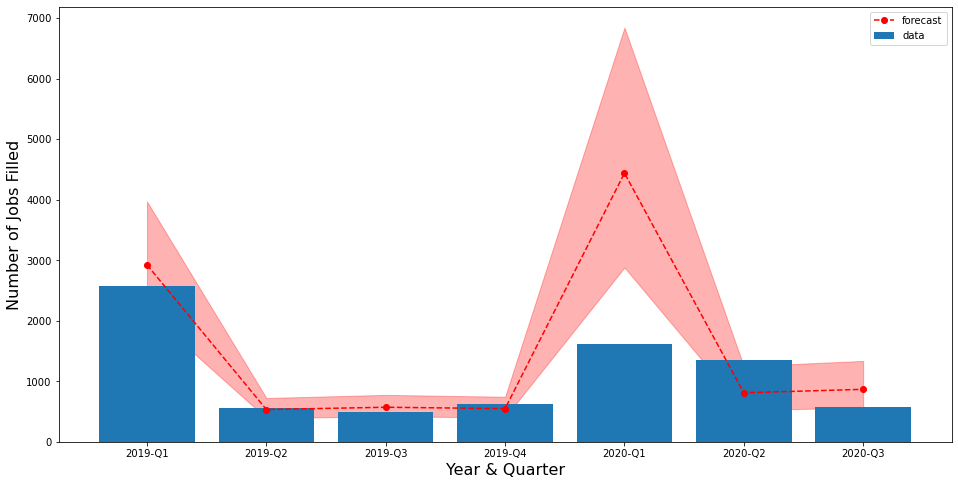

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(test.index, np.exp(test['Log Jobs Filled']), label='data')
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.plot(test.index, np.exp(test_pred), '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0, 0.5, 'Number of Jobs Filled')

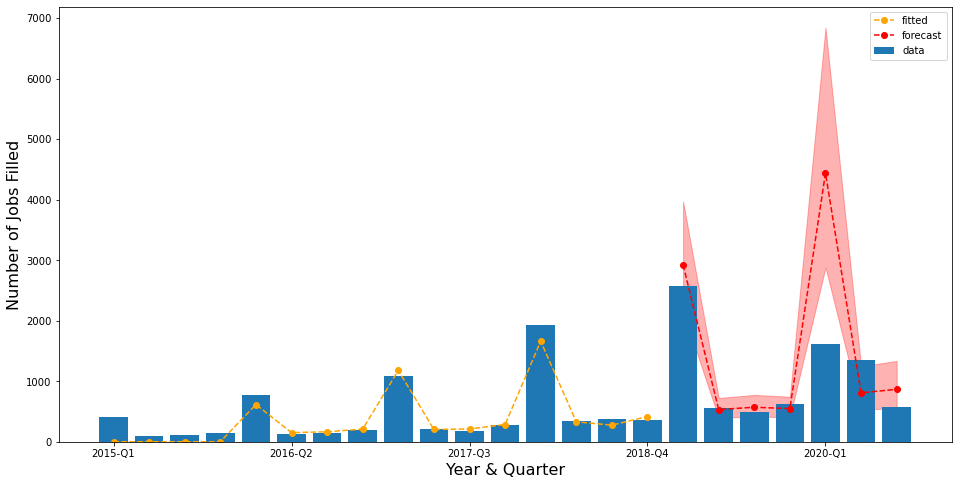

In [25]:
train_pred = logmodel1.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'], '--', marker='o', label='data')
ax.bar(data.index, np.exp(data['Log Jobs Filled']), label='data')
ax.plot(train.index, np.exp(train_pred), '--', marker='o', color='orange', label='fitted')
ax.plot(test.index, np.exp(test_pred), '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
ax.legend();
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)

In [26]:
print("Train set RMSE:", rmse(np.exp(train['Log Jobs Filled']), np.exp(train_pred)))
print("Validation set RMSE:", rmse(np.exp(test['Log Jobs Filled'][:4]), np.exp(test_pred[:4])))
print("Test set RMSE:", rmse(np.exp(test['Log Jobs Filled'][-3:]), np.exp(test_pred[-3:])))

Train set RMSE: 141.93684424646486
Validation set RMSE: 182.9558759843171
Test set RMSE: 1672.0779560025628


In [31]:
pred = int(sum(np.exp(test_pred[:4])).round())
actual = sum(np.exp(test["Log Jobs Filled"][:4]))
print("Predicted number of jobs created in 2019: ", pred )
print("Actual number of jobs created in 2019: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

pred = int(sum(np.exp(test_pred[-3:]).round()))
actual = sum(test["Jobs Filled"][-3:])
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

Predicted number of jobs created in 2019:  4576
Actual number of jobs created in 2019:  4262.0
Model is off by:  7.4 % of the actual number of jobs created.
 
Predicted number of jobs created in 2020:  6117
Actual number of jobs created in 2020:  3538
Model is off by:  72.9 % of the actual number of jobs created.
 


In [32]:
train, test = data.iloc[:20,:], data.iloc[20:,:]

In [33]:
model2 = pm.auto_arima(train['Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=226.514, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=222.510, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=218.046, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=220.059, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=231.304, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=224.037, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=219.804, Time=0.14 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=219.858, Time=0.14 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=220.100, Time=0.05 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=216.062, Time=0.05 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=217.807, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=217.829, Time=0.10 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=218.481, Time=0.03 sec
 ARIMA(0,0,0)(2,1,1)[4] intercept   : AIC=inf, Time

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   20
Model:             SARIMAX(1, 1, 0, 4)   Log Likelihood                -105.031
Date:                 Tue, 02 Feb 2021   AIC                            216.062
Time:                         16:27:54   BIC                            218.379
Sample:                              0   HQIC                           216.180
                                  - 20                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.5914    149.380      0.466      0.641    -223.187     362.370
ar.S.L4        0.6828      0.656      1.041      0.298      -0.603       1.969
sigma2      2.554e+04   8755.189      2.917      0.004    8378.934    4.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.24
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             2.12
Prob(H) (two-sided):                  0.47   Kurtosis:                         7.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
nTest = len(test)
test_pred, confint = model2.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


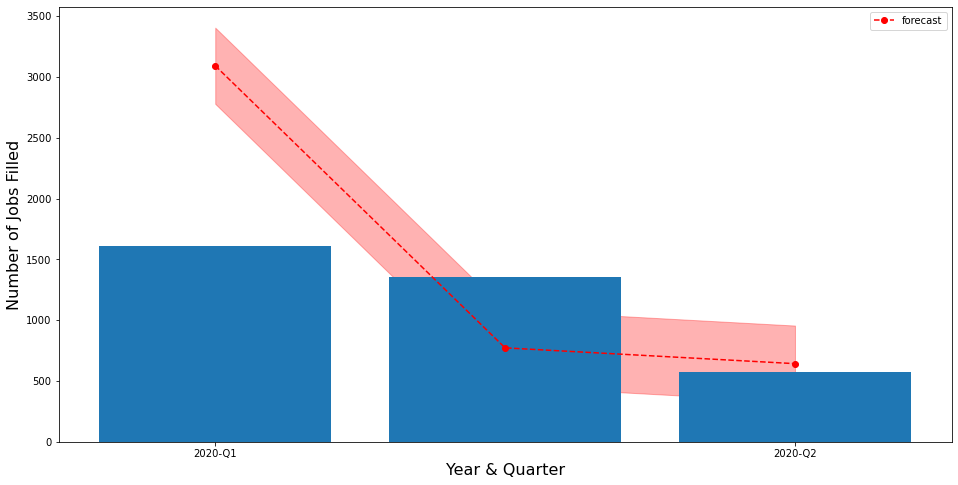

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.bar(test.index, test['Jobs Filled'])
ax.plot(test.index, test_pred, '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
plt.locator_params(axis='x', nbins=3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


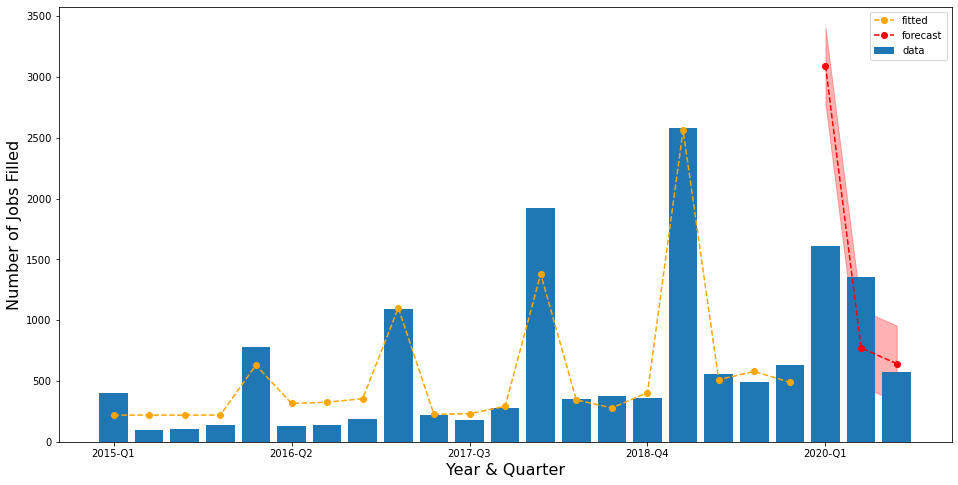

In [37]:
train_pred = model2.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'],'--', marker='o', label='data')
ax.bar(data.index, data['Jobs Filled'], label='data')
ax.plot(train.index, train_pred,'--', marker='o', color='orange', label='fitted')
ax.plot(test.index, test_pred,'--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

In [38]:
print("Train set RMSE:", rmse(train['Jobs Filled'], train_pred))
print("Old Validation set RMSE:", rmse(train['Jobs Filled'][-4:], train_pred[-4:]))
print("Test set RMSE:", rmse(test['Jobs Filled'][-3:], test_pred[-3:]))

Train set RMSE: 162.11967212118006
Old Validation set RMSE: 87.03063328580666
Test set RMSE: 919.4455849436653


In [39]:
pred = int(sum(test_pred.round()))
actual = sum(test["Jobs Filled"])
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")

Predicted number of jobs created in 2020:  4506
Actual number of jobs created in 2020:  3538
Model is off by 27.4 % of the actual number of jobs created.


In [40]:
logmodel2 = pm.auto_arima(train['Log Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=-8.905, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-11.655, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-11.006, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=21.033, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=-12.859, Time=0.06 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=-11.125, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=-11.559, Time=0.16 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=-13.546, Time=0.05 sec
 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=-11.555, Time=0.07 sec
 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=-9.547, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=-11.638, Time=0.08 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[4]             : AIC=16.093, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,1,1)[4] intercept
Total fit ti

In [42]:
logmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                   20
Model:             SARIMAX(0, 1, [1], 4)   Log Likelihood                   9.773
Date:                   Tue, 02 Feb 2021   AIC                            -13.546
Time:                           16:29:58   BIC                            -11.228
Sample:                                0   HQIC                           -13.427
                                    - 20                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4178      0.023     17.912      0.000       0.372       0.464
ma.S.L4       -0.7427      0.758     -0.980      0.327      -2.228       0.743
sigma2         0.0143      0.009      1.559      0.119      -0.004       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.85   Prob(JB):                         0.76
Heteroskedasticity (H):               0.65   Skew:                            -0.00
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
nTest = len(test)
test_pred, confint = logmodel2.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


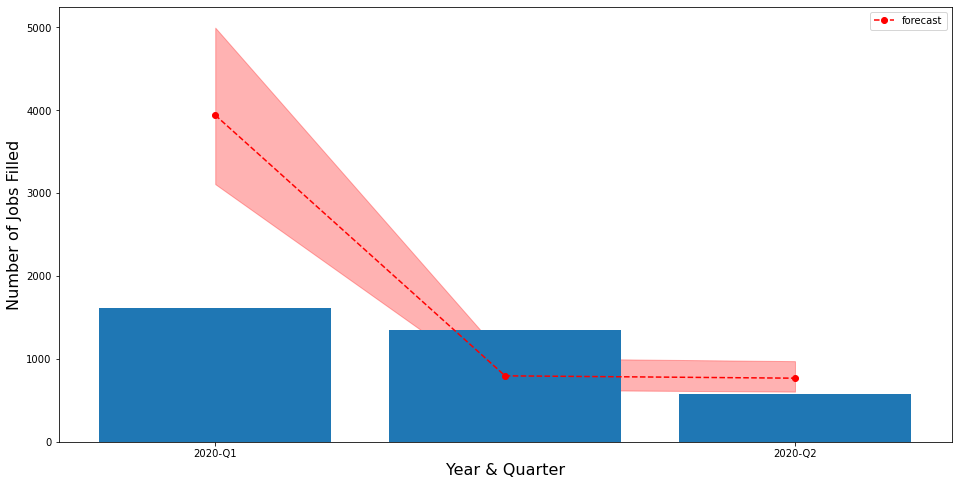

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.bar(test.index, np.exp(test['Log Jobs Filled']))
ax.plot(test.index, np.exp(test_pred), '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
plt.locator_params(axis='x', nbins=3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


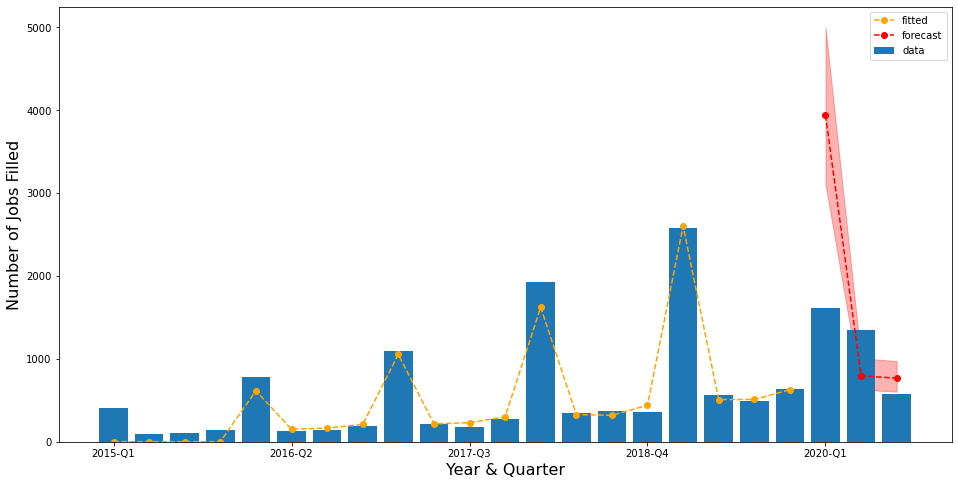

In [45]:
train_pred = logmodel2.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'],'--', marker='o', label='data')
ax.bar(data.index, np.exp(data['Log Jobs Filled']), label='data')
ax.plot(train.index, np.exp(train_pred),'--', marker='o', color='orange', label='fitted')
ax.plot(test.index, np.exp(test_pred),'--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

In [46]:
print("Train set RMSE:", rmse(np.exp(train['Log Jobs Filled']), np.exp(train_pred)))
print("Old Validation set RMSE:", rmse(np.exp(train['Log Jobs Filled'])[-4:], np.exp(train_pred)[-4:]))
print("Test set RMSE:", rmse(np.exp(test['Log Jobs Filled'])[-3:], np.exp(test_pred)[-3:]))

Train set RMSE: 130.19895334702144
Old Validation set RMSE: 29.716508580350347
Test set RMSE: 1388.8663444745432


In [49]:
pred = int(sum(np.exp(test_pred).round()))
actual = sum(np.exp(test["Log Jobs Filled"]))
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")

Predicted number of jobs created in 2020:  5507
Actual number of jobs created in 2020:  3538.000000000001
Model is off by 55.7 % of the actual number of jobs created.


Even though the model performance on the log of the data in someways performs better. More specifically, look at the extreme difference in the validation set in 2019 for the regular data versus the log data in 2019 compared to the training data. I still prefer the SARIMA model with the regular data because the project job growth for 2019 is huge. If this were the case, then this would have been the largest growth compared to the positions from the previous year.  